<a href="https://colab.research.google.com/github/singh10tejas/Festival_recognition/blob/master/Notebook2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Mounting the drive***

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


# **Upload kaggle.json file**

In [ ]:
from google.colab import files
my_file=files.upload()

Saving kaggle.json to kaggle.json


## **Setting up environment variables so that kaggle api can work properly.**

In [ ]:
import os
import pandas as pd
cred = pd.read_json("kaggle.json",lines=True)
os.environ['KAGGLE_USERNAME'] = cred.iloc[0][0]
os.environ['KAGGLE_KEY'] = cred.iloc[0][1]

## **Downloading the required dataset for the particular project**

In [ ]:
!kaggle datasets download -d singh10tejas/Festivals

 64% 33.0M/51.7M [00:01<00:01, 19.3MB/s]
100% 51.7M/51.7M [00:01<00:00, 33.5MB/s]


# **Unzip downloaded data**

In [ ]:
! unzip "*.zip" -d /content/Fest

Archive:  Festivals.zip
  inflating: /content/Fest/Christmas/00000000.jpg  
  inflating: /content/Fest/Christmas/00000001.jpg  
  inflating: /content/Fest/Christmas/00000002.jpg  
  inflating: /content/Fest/Christmas/00000003.jpg  
  inflating: /content/Fest/Christmas/00000004.jpg  
  inflating: /content/Fest/Christmas/00000005.jpg  
  inflating: /content/Fest/Christmas/00000006.jpg  
  inflating: /content/Fest/Christmas/00000007.jpg  
  inflating: /content/Fest/Christmas/00000008.jpg  
  inflating: /content/Fest/Christmas/00000009.jpg  
  inflating: /content/Fest/Christmas/00000010.jpg  
  inflating: /content/Fest/Christmas/00000011.jpg  
  inflating: /content/Fest/Christmas/00000012.jpg  
  inflating: /content/Fest/Christmas/00000013.jpg  
  inflating: /content/Fest/Christmas/00000014.jpg  
  inflating: /content/Fest/Christmas/00000015.jpg  
  inflating: /content/Fest/Christmas/00000016.jpg  
  inflating: /content/Fest/Christmas/00000017.jpg  
  inflating: /content/Fest/Christmas/000

# **Exploring the data**

In [ ]:
os.listdir("Fest")

['Christmas',
 'Lohri',
 'EID',
 'Independence Day',
 'Diwali',
 'Holi',
 'Ganesh Chaturthi']

# **Importing required libraries**

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from fastai.vision import *
from fastai.metrics import error_rate
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

# **Defining the batch size**

In [ ]:
bs=64

# **Definig classes that data contains**

In [ ]:
classes = ['Christmas','Diwali','Ganesh Chaturthi','EID','Holi','Independence Day','Lohri']

## ***We can verify that we don’t have any corrupt images using the verify_images method.***


In [ ]:
for c in classes:
    print(c)
    verify_images(path = Path('Fest'), delete=True, max_size=500)

Christmas
Diwali
Ganesh Chaturthi
EID
Holi
Independence Day
Lohri


# **FastAI has specific data objects called databunches which are needed to train a model**
# Creating data bunch

In [ ]:
data = ImageDataBunch.from_folder( Path("Fest"), valid_pct=0.2, bs=64, size=224, ds_tfms=get_transforms())

## **We can show a random batch of images using the show_batch method.**

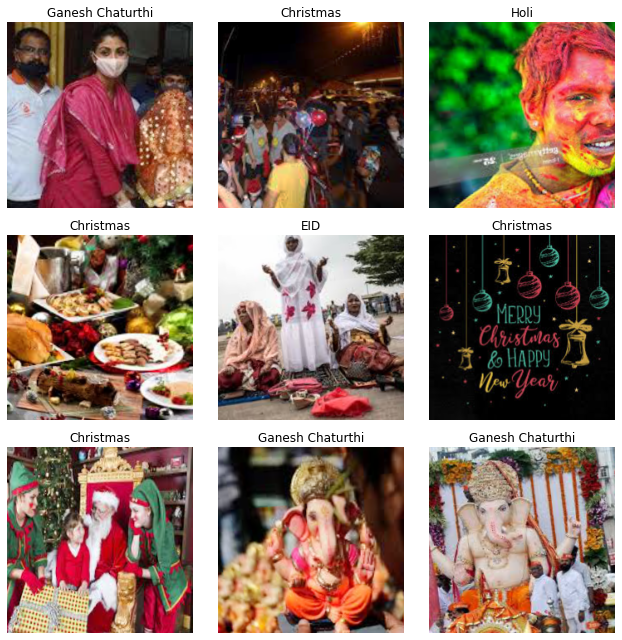

In [ ]:
data.show_batch(rows=3, figsize=(9,9))

## **Exploring different classes present in data**

In [ ]:
print(data.classes)
len(data.classes)

['Christmas', 'Diwali', 'EID', 'Ganesh Chaturthi', 'Holi', 'Independence Day', 'Lohri']


7

***Creating a model to get trained...***

And here about the paramters like 

***data ***--> databunch we have created(converting data in a format so that it can be trained)

***models.resnet50*** -->resnet50 model will be used  and details are discussed in lesson 1 and after this if you still not getting it it"s fine you will get used to it with the coming lessons but atleast try to understand these concepts by going to previous lessons again so that you can have a better understanding

***metrices*** --> We have talked enough  about this in lesson 1 but just for idea  it don"t have any role in training it just show accuracy after each epoch so that we can see how well our model is doing.

In [ ]:
learn = cnn_learner(data, models.resnet50, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


##**To train the layers we can use the fit or fit_one_cycle method.** 

In [ ]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,0.265153,0.843351,0.764151,00:42
1,0.321473,0.919263,0.751179,00:41
2,0.292171,0.853525,0.774764,00:41
3,0.254069,0.840297,0.771226,00:42


## **Now that the fully-connected layers are well trained we can unfreeze the other layers and train the whole network.**

In [ ]:
learn.unfreeze()

In [ ]:
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,accuracy,time
0,0.246840,0.906025,0.748821,00:42
1,0.569748,1.855048,0.661557,00:43
2,0.683286,0.909402,0.740566,00:44
3,0.566521,0.840760,0.725236,00:43
4,0.409968,0.866027,0.760613,00:43
5,0.277301,0.737050,0.793632,00:43
6,0.178838,0.713216,0.817217,00:43
7,0.115659,0.691102,0.818396,00:43


In [ ]:
os.makedirs("/content/drive/My Drive/dl_projects/Festival_recognition",exist_ok=True)

###**Saving our directory path to a variable so that we don"t have to write so long everytime to refer to the directory**

In [ ]:
my_dir="/content/drive/My Drive/dl_projects/Festival_recognition"

## **Saving the state with name as stage-1 in Google drive directory..**

In [ ]:
learn.save(my_dir+"/Stage-1")

In [ ]:
learn.load(my_dir+"/Stage-1")

Learner(data=ImageDataBunch;

Train: LabelList (3396 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Christmas,Christmas,Christmas,Christmas,Christmas
Path: Fest;

Valid: LabelList (848 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Lohri,Lohri,Independence Day,Ganesh Chaturthi,Independence Day
Path: Fest;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1,

In [ ]:
learn.export(my_dir+"/export.pkl")

## **To find the perfect learning rates we can use the lr_find and recorder.plot methods which create a plot that relates the learning rate with the loss.**

In [ ]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


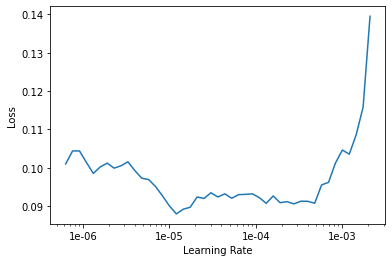

In [ ]:
learn.recorder.plot()

###**Lastly, we can use FastAIs ClassificationInterpretation class to interpret our results. To create an interpretation object we need to call the from_learner method and pass it our learner/model. Then we can use methods like plot_confusion_matrix, plot_top_losses or most_confused.**

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

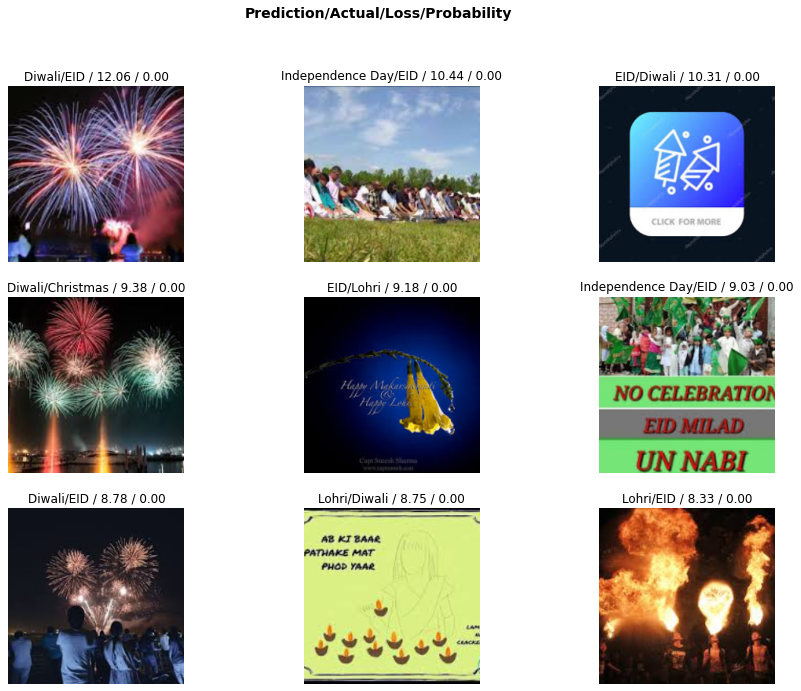

In [ ]:
interp.plot_top_losses(9, figsize=(15,11))

## **Plot confusion matrix:**

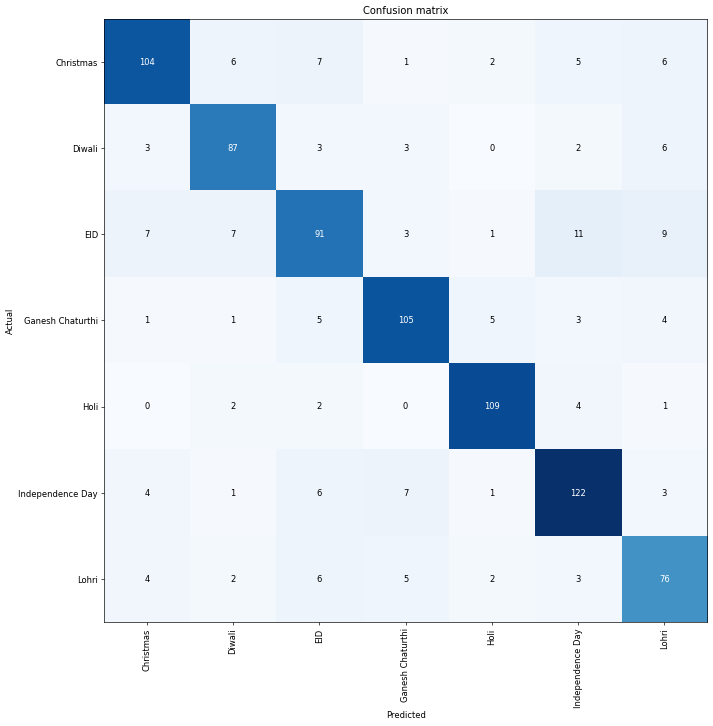

In [ ]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)